Name: Allyson Busch 
    
Date: 12/06/2019

# Predicting Movie Ratings of Nic Cage Movies

The Kaggle data set can be found at: https://www.kaggle.com/eharlett/nic-cage-movies and contains a curated dataset on Nicolas Cage movies. The data set lists all of Nic Cage's released acting roles, gathered from IMDb.  

Nicolas Cage is an American actor and filmmaker who has received an Academy Award, a Golden Globe, and a Screen Actors Guild Award. He is known for movies such as Peggy Sue Got Married, Moon Struck, National Treasure, and Ghost Rider.

The goal of this project is to utilize the data set provided to see if they have any predicting power on whether the movie will receive a good rating.

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt

In [2]:
# importing the data

nic = pd.read_csv('nic-cage.csv')

## Exploratory Data Analysis

Looking at the dataset, we can see there are 6 variables included. The first of these variables is Movie, which lists the name of the movie as it appears on IMBd. The next variable is Rating, which is the rating given by the Motion Picture Association of America. The third variable is Character, which includes the character name he had in the film. The four variable is Voice, which is binary with 0 indicating live action and 1 indicating a voice acting role. Year is a numerical data point of the year the film was released. The final variable is RottenTomatoes which gives the score as indicated on the film review website.

In [4]:
nic

,Movie,Rating,Character,Voice,Year,RottenTomatoes
0,A Score to Settle,NR,Frank Pierce,0,2019,13
1,Spider-Man: Into the Spider-Verse,PG,Spider-Man Noir,1,2018,97
2,Between Worlds,R,Joe,0,2018,X
3,Teen Titans Go! To the Movies,PG,Superman,1,2018,91
4,211,R,Mike Chandler,0,2018,5
5,Looking Glass,R,Ray,0,2018,17
6,Mandy,NR,Red Miller,0,2018,91
7,The Humanity Bureau,R,Noah Kross,0,2017,25
8,Mom and Dad,R,Brent,0,2017,74
9,Inconceivable,R,Brian,0,2017,31


In [6]:
nic.shape

(91, 6)

There are 91 books contained in the dataset.

In [7]:
nic.describe()

,Voice,Year
count,91.000000,91.000000
mean,0.076923,2003.296703
std,0.267946,11.280755
min,0.000000,1981.000000
25%,0.000000,1994.000000
50%,0.000000,2006.000000
75%,0.000000,2013.500000
max,1.000000,2019.000000


Since we have only two numerical values currently, we can determine that most of the roles Nic Cage portrayed were live action (0) and that the movies he has acted in range in release from 1981 to 2019 with a standard deviation of 11 years. 

In [8]:
nic.isnull().sum()

Movie             0
Rating            0
Character         0
Voice             0
Year              0
RottenTomatoes    0
dtype: int64

None of the variables contain null values, so we can move onto changing variables into numericals to make a better prediction model.

In [11]:
nic.describe(include='all').loc['unique', :]

Movie              91
Rating              6
Character          86
Voice             NaN
Year              NaN
RottenTomatoes     58
Name: unique, dtype: object

In [12]:
nic['Rating'].value_counts()

R        49
PG-13    19
PG       14
NR        6
TV-NR     2
TV-MA     1
Name: Rating, dtype: int64

Looking particularly at the Ratings, as we want to change them into numerical values, we can see that there are 6 unique values. Ratings have a intrinsic ranking (from G to NR), so it is safe to put these as a categorical variable. For the sake of making a clean data set, we are combining TV-NR, TV-MA, and NR into one category. We are putting NR as 1, R as 2, PG-12 as 3, and PG as 4.

In [13]:
cleanup_nums = {'Rating':   {"R": 2, "PG-13": 3, "PG": 4, "NR": 1, "TV-NR": 1, "TV-MA": 1}}

In [14]:
nic.replace(cleanup_nums, inplace=True)
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes
0,A Score to Settle,1,Frank Pierce,0,2019,13
1,Spider-Man: Into the Spider-Verse,4,Spider-Man Noir,1,2018,97
2,Between Worlds,2,Joe,0,2018,X
3,Teen Titans Go! To the Movies,4,Superman,1,2018,91
4,211,2,Mike Chandler,0,2018,5


Now I want to get rid of the movies that have a missing value for Rotten Tomatoes (listed as an X). Since we only have 90 movies, this may impact the dataset, but filling in an average for these may skew the dataset more.

In [18]:
cleanup_RT = {'RottenTomatoes': {"X": 0}}

In [19]:
nic.replace(cleanup_RT, inplace=True)
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes
0,A Score to Settle,1,Frank Pierce,0,2019,13
1,Spider-Man: Into the Spider-Verse,4,Spider-Man Noir,1,2018,97
2,Between Worlds,2,Joe,0,2018,0
3,Teen Titans Go! To the Movies,4,Superman,1,2018,91
4,211,2,Mike Chandler,0,2018,5


In [20]:
nic = nic[nic.RottenTomatoes !=0]

In [21]:
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes
0,A Score to Settle,1,Frank Pierce,0,2019,13
1,Spider-Man: Into the Spider-Verse,4,Spider-Man Noir,1,2018,97
3,Teen Titans Go! To the Movies,4,Superman,1,2018,91
4,211,2,Mike Chandler,0,2018,5
5,Looking Glass,2,Ray,0,2018,17


## Correlation

We can now look at the correlation between the numeric variables we currently have.

In [33]:
nic.corr()

,Rating,Voice,Year,RottenTomatoes
Rating,1.000000,0.534989,-0.186654,0.064938
Voice,0.534989,1.000000,0.187027,0.115015
Year,-0.186654,0.187027,1.000000,-0.361240
RottenTomatoes,0.064938,0.115015,-0.361240,1.000000


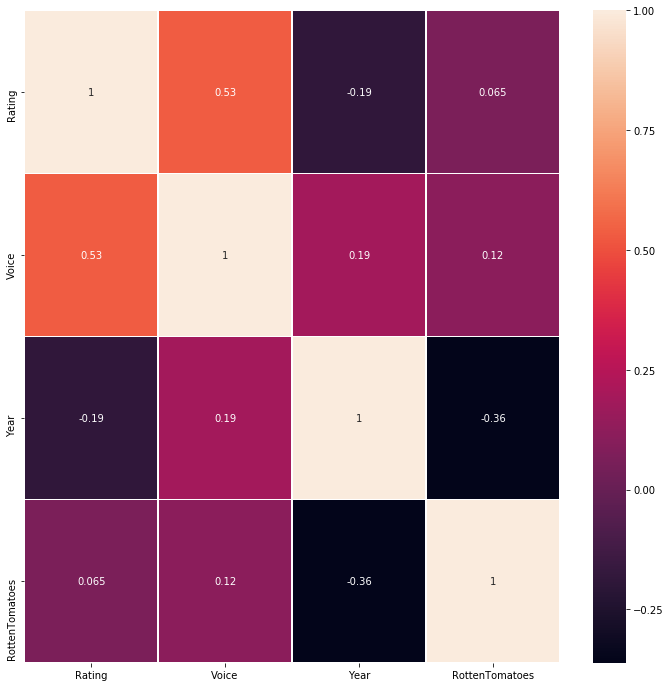

In [34]:
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(nic.corr(), annot=True, linewidths=0.5)
plt.show()

None of the variables we have  (Year, Live Action, and Rating) have a huge correlation with the Rotten Tomatoes score. Year, with a negative 0.36 correlation, seems to say that as the year increases (we get closer to 2019) the review score on Rotten Tomatoes goes down. 

Initially the intent was to add an additional file on whether or not Nicolas Cage was considered a lead actor, or 'starring' in the film. However, it quickly became clear that every movie in the recent years considers Nicolas Cage a starring actor, so this would likely not have any bearing on the predictive ability of the model. It could potentially skew the prediction, as actors are less likely to star in movies when they are a beginning actor and more likely to be a lead actor in later movies as they are more well known. 